# Screening experiment

### Setting up the environment

In [1]:
import numpy as np
from IPython.core.display import display, HTML
import pylab as pl
import pandas as pd
%matplotlib inline

dataset_folder = "../datasets/"

import sys
sys.path.insert(0, '../platemate/platemate/')
import platemate as pm

### Preparing PlateMate

In [2]:
ColumnNames = {
    "Z10M" : "A",
    "Z5M"  : "B",
    "Z10A" : ["C1","C4"],
    "Z5A"  : ["C5","C12","D1","D12"],
    "Z10T" : ["E1","E4"],
    "Z5T"  : ["E5","E12","F1","F12"],
    "Z5S"  : ["G"]
    }

controlNames = {
    "cc1690"  : ["H1","H6"],
    "TAP"     : ["H7","H9"],
    "mCh" : ["H10","H12"]
    }


In [3]:
reload(pm)
experiment = pm.PlateMate( colonyMap = ColumnNames, controlMap = controlNames )
experiment.findFiles("20161003 pJP22mcherry", extension = "xlsx", path = dataset_folder)

### Reading the files

In [4]:
experiment.readfromSpreadSheet("Blue", 74)
experiment.readfromSpreadSheet("mCherry", 36)
experiment.readfromSpreadSheet("OD",106)
experiment.readfromSpreadSheet("Chloro", 144)

### Separated plot for each colony and channel

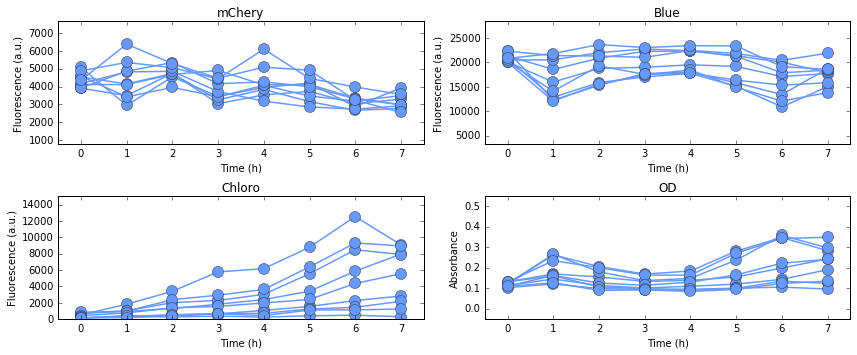

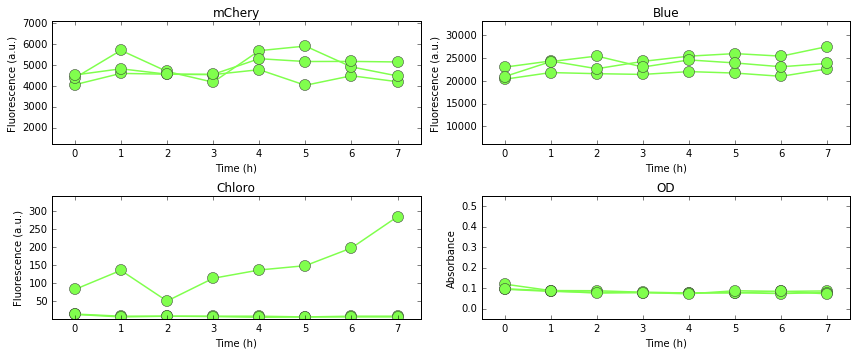

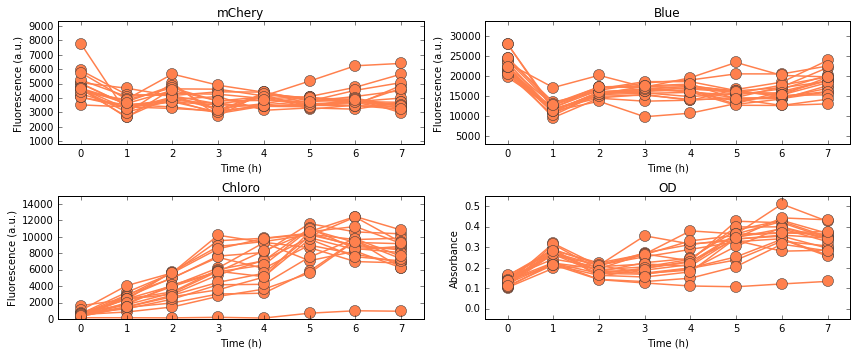

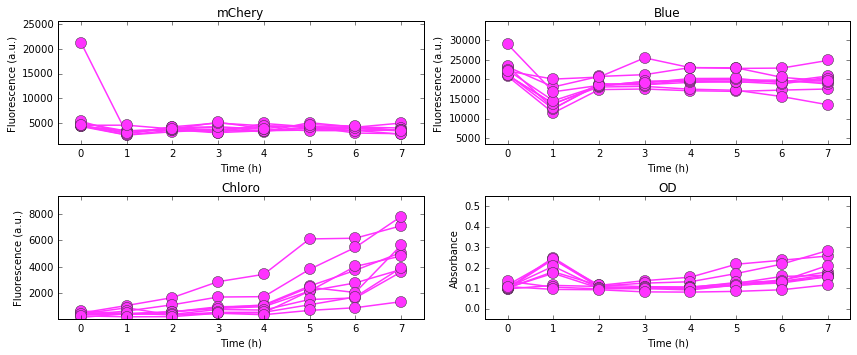

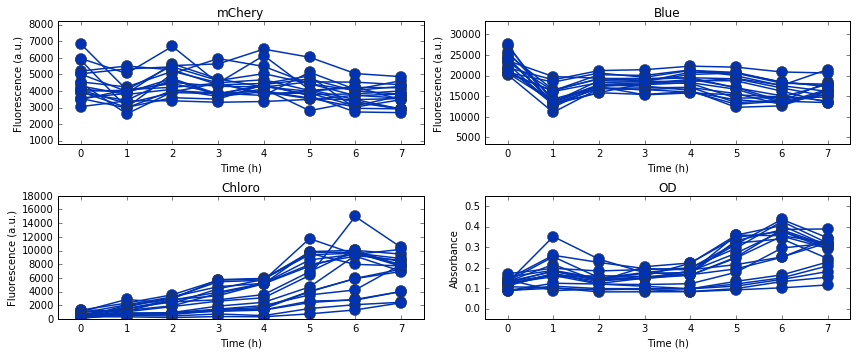

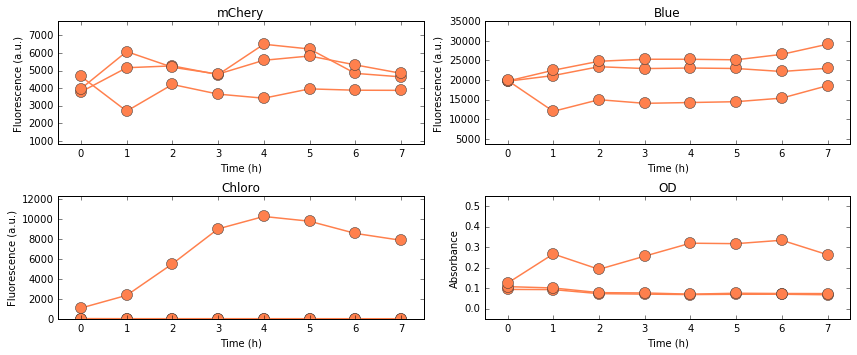

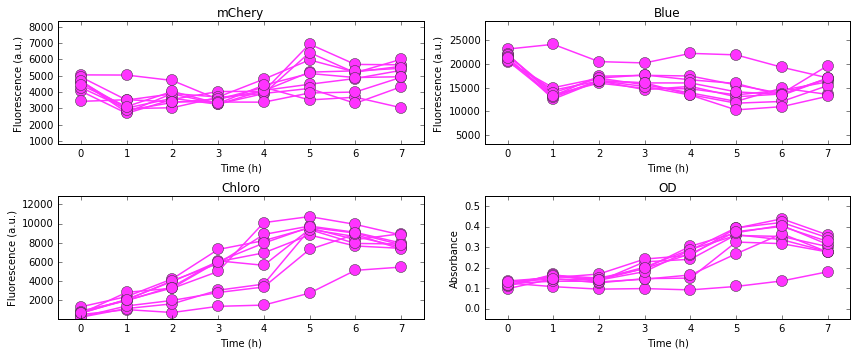

In [5]:
for colony in experiment.colonyNames:
    
    display( HTML('<b>' + colony + '</b>') )
    f, ax = pl.subplots(2,2, figsize=(12,5))
    
    maxx = 7.5
    
    experiment.plotIt("mCherry", colony, ax[0,0])
    ax[0,0].set_title("mChery")
    ax[0,0].set_xlim(-0.5,maxx)
    experiment.plotIt("Blue", colony, ax[0,1])
    ax[0,1].set_title("Blue")
    ax[0,1].set_xlim(-0.5,maxx)
    experiment.plotIt("Chloro", colony, ax[1,0])
    ax[1,0].set_title("Chloro")
    ax[1,0].set_xlim(-0.5,maxx)
    experiment.plotIt("OD", colony, ax[1,1], ylabel="Absorbance")
    ax[1,1].set_title("OD")
    ax[1,1].set_xlim(-0.5,maxx)
    ax[1,1].set_ylim(-0.05,0.55)
    
    
    pl.tight_layout()
    pl.savefig("Plots Screening 1/Plot_" + colony + ".png", dpi=400)
    pl.show()

### Showing the TOP 5 for mCherry

A ideia eh comparar diversos pocos para as mesmas populacoes. Como nao houve crescimento no sinal (normalizando ou nao), calculamos a media ao longo do periodo medido. Usando essa media do canal mCherry, ranqueamos os pocos para cada populacao.

In [6]:
experiment.normalizeAllFluorescence("mCherry","OD")
experiment.normalizeAllFluorescence("Blue","OD")
experiment.normalizeAllFluorescence("Chloro","OD")

Primeiro, de forma geral:

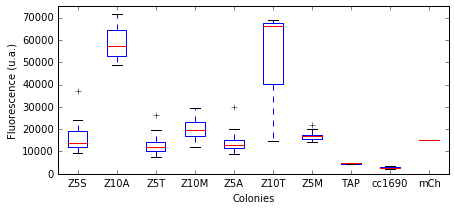

In [7]:
pl.figure( figsize=(7,3) )
experiment.snapshotBoxWhiskers("mCherry", 7, showControl = True)
pl.ylim(0,75000)

pl.savefig("BoxWhiskers Screening1.png", dpi=400)
pl.show()

Agora de forma mais especifica:

In [8]:
for colony in experiment.colonyNames:
    display( HTML('<b>' + colony + '</b>') )
    display(
        HTML( experiment.getMeanFluorescence(colony,"mCherry").sort_values('Mean', ascending=False).head(5).to_html()) 
    )

,Mean
G09,44709.096562
G08,43616.262522
G07,39501.425886
G05,33299.731955
G06,25709.356854


,Mean
C03,60717.660124
C02,60258.955036
C01,53518.749210


,Mean
F08,30570.918120
F06,25713.423634
F05,20137.899908
F11,19996.530536
E09,19351.343319


,Mean
A08,52604.883791
A09,47632.696504
A03,37091.296486
A07,34256.867514
A02,30500.838425


,Mean
D05,46932.157461
C11,43360.509413
D10,35179.351309
D09,33196.574159
D11,32494.833899


,Mean
E01,69757.469237
E02,65327.981613
E03,16677.589570


,Mean
B01,37203.797003
B05,26527.427703
B03,22024.825757
B06,21282.403575
B09,19845.470850
